# PENGAMBILAN SAMPEL

## HUMAN EVALUATION

In [1]:
from datasets import load_dataset
import pandas as pd
import random

def sample_charts_human_eval(dataset_path: str = "akunskripsiapillv1/indochart-v2-dataset", seed: int = 2025, n_samples: int = 6):
    # Load dataset
    ds = load_dataset(dataset_path, split="test")
    
    # Convert to pandas DataFrame
    df = pd.DataFrame(ds)
    
    # Set seed for reproducibility
    random.seed(seed)
    
    # Get unique combinations of source and chartType
    combinations = df[['source', 'chartType']].drop_duplicates()
    
    samples = []
    
    # For each unique (source, chartType), sample n_samples rows
    for _, row in combinations.iterrows():
        source = row['source']
        chart_type = row['chartType']
        
        df_subset = df[(df['source'] == source) & (df['chartType'] == chart_type)]
        
        if len(df_subset) >= n_samples:
            sampled_rows = df_subset.sample(n=n_samples, random_state=seed)
        else:
            # If not enough samples, take all available (optional: or skip)
            sampled_rows = df_subset
        
        samples.append(sampled_rows)
    
    return pd.concat(samples)

In [2]:
result_human_eval = sample_charts_human_eval()
result_human_eval.to_csv("sample_charts_human_eval.csv", index=False)

train.parquet:   0%|          | 0.00/2.19G [00:00<?, ?B/s]

val.parquet:   0%|          | 0.00/274M [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/273M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/29423 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3678 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3678 [00:00<?, ? examples/s]

## SKENARIO TESTING

In [3]:
from datasets import load_dataset
import pandas as pd
import random

def sample_charts(dataset_path: str = "akunskripsiapillv1/indochart-v2-dataset", seed: int = 2025):
    # Load dataset
    ds = load_dataset(dataset_path, split="test")

    # Convert to pandas DataFrame for easier manipulation
    df = pd.DataFrame(ds)

    # Filter source == 'bps'
    df_bps = df[df['source'] == 'bps']

    # Get unique chart types
    chart_types = df_bps['chartType'].unique()

    # Set seed for reproducibility
    random.seed(seed)

    # Sample one imgname per chartType
    samples = []
    for chart_type in chart_types:
        df_chart = df_bps[df_bps['chartType'] == chart_type]
        if not df_chart.empty:
            sample_row = df_chart.sample(n=1, random_state=seed)
            imgname = sample_row.iloc[0]['imgname']
            samples.append(imgname)

    return samples

In [4]:
result_skenario_testing = sample_charts()
print(result_skenario_testing)

['T0161_donut_c.png', 'T0452_column_a.png', 'T1001_pie_b.png', 'T0621_bar_a.png']


Dari pengambilan sampel tersebut, diperoleh image name yang digunakan untuk skenario testing yaitu

* T0161_donut_c.png
* T0452_column_a.png
* T1001_pie_b.png
* T0621_bar_a.png

# UNDUH GAMBAR SAMPEL

In [5]:
import gdown

# T0161_donut_c.png
file_id = '1J4MPKGYGj4vvQydeRZsT74D-INOgyv0M'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'T0161_donut_c.png'
gdown.download(url, output, quiet=False)

# T0452_column_a.png
file_id = '1XwPIledLfyd2-qBf9lZjj8PAQQ_nTgwC'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'T0452_column_a.png'
gdown.download(url, output, quiet=False)

# T1001_pie_b.png
file_id = '1tfXYf3Zpn65jcKHV3sHAYOVmtK1spEWf'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'T1001_pie_b.png'
gdown.download(url, output, quiet=False)

# T0621_bar_a.png
file_id = '19apV8ffcEyADVimHy88MAcxM-F-NtLTq'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'T0621_bar_a.png'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1J4MPKGYGj4vvQydeRZsT74D-INOgyv0M
To: /kaggle/working/T0161_donut_c.png
100%|██████████| 238k/238k [00:00<00:00, 66.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XwPIledLfyd2-qBf9lZjj8PAQQ_nTgwC
To: /kaggle/working/T0452_column_a.png
100%|██████████| 160k/160k [00:00<00:00, 57.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tfXYf3Zpn65jcKHV3sHAYOVmtK1spEWf
To: /kaggle/working/T1001_pie_b.png
100%|██████████| 196k/196k [00:00<00:00, 66.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=19apV8ffcEyADVimHy88MAcxM-F-NtLTq
To: /kaggle/working/T0621_bar_a.png
100%|██████████| 130k/130k [00:00<00:00, 43.1MB/s]


'T0621_bar_a.png'

# PIXEL RESOLUTION

In [6]:
from PIL import Image
import os

def resize_chart_image(image_path, resolutions=None, output_folder="resized_images"):
    """
    Resize gambar chart ke berbagai resolusi dan simpan dengan nama yang dimodifikasi.
    
    Parameters:
    - image_path (str): Path gambar asli.
    - resolutions (list of tuple): List resolusi (width, height). Jika None, pakai default.
    - output_folder (str): Folder untuk menyimpan gambar hasil resize.
    """
    if resolutions is None:
        resolutions = [
            (1280, 720),  # High definition (HD) (720p)
            (640, 480),   # Standar definition (480p)
            (480, 360),   # Low definition (360p)
            (320, 240),   # Quarter VGA (320p)
            (160, 120),   # Very low resolution
            (96, 54)      # Extremely low resolution
        ]
    
    # Buka gambar asli
    image = Image.open(image_path)

    # Lihat resolusi asli
    print("Resolusi asli:", image.size)
    
    # Ambil nama file dasar tanpa ekstensi
    basename = os.path.splitext(os.path.basename(image_path))[0]
    
    # Buat folder output jika belum ada
    os.makedirs(output_folder, exist_ok=True)
    
    # Resize dan simpan
    for width, height in resolutions:
        resized_image = image.resize((width, height), resample=Image.Resampling.BILINEAR)
        filename = f"{basename}_{width}x{height}.png"
        save_path = os.path.join(output_folder, filename)
        resized_image.save(save_path)
        print(f"Simpan: {save_path}")

# custom_sizes = [(640, 360), (1024, 768)]
# resize_chart_image("/kaggle/working/sample/T0169_bar_a.png", resolutions=custom_sizes)

In [7]:
resize_chart_image("/kaggle/working/T0161_donut_c.png")
resize_chart_image("/kaggle/working/T0452_column_a.png")
resize_chart_image("/kaggle/working/T1001_pie_b.png")
resize_chart_image("/kaggle/working/T0621_bar_a.png")

Resolusi asli: (3470, 2314)
Simpan: resized_images/T0161_donut_c_1280x720.png
Simpan: resized_images/T0161_donut_c_640x480.png
Simpan: resized_images/T0161_donut_c_480x360.png
Simpan: resized_images/T0161_donut_c_320x240.png
Simpan: resized_images/T0161_donut_c_160x120.png
Simpan: resized_images/T0161_donut_c_96x54.png
Resolusi asli: (3570, 2384)
Simpan: resized_images/T0452_column_a_1280x720.png
Simpan: resized_images/T0452_column_a_640x480.png
Simpan: resized_images/T0452_column_a_480x360.png
Simpan: resized_images/T0452_column_a_320x240.png
Simpan: resized_images/T0452_column_a_160x120.png
Simpan: resized_images/T0452_column_a_96x54.png
Resolusi asli: (2850, 2029)
Simpan: resized_images/T1001_pie_b_1280x720.png
Simpan: resized_images/T1001_pie_b_640x480.png
Simpan: resized_images/T1001_pie_b_480x360.png
Simpan: resized_images/T1001_pie_b_320x240.png
Simpan: resized_images/T1001_pie_b_160x120.png
Simpan: resized_images/T1001_pie_b_96x54.png
Resolusi asli: (3569, 2366)
Simpan: resized

In [8]:
import shutil

def zip_folder(folder_path, output_zip_path):
    """
    Zip seluruh folder menjadi 1 file zip.
    
    :param folder_path: path ke folder yang mau di-zip
    :param output_zip_path: path file zip hasilnya (tanpa ekstensi .zip)
    """
    shutil.make_archive(output_zip_path, 'zip', folder_path)
    print(f"Folder {folder_path} berhasil di-zip ke {output_zip_path}.zip")

zip_folder('/kaggle/working/resized_images', 'output_resolutions')

Folder /kaggle/working/resized_images berhasil di-zip ke output_resolutions.zip


# ADD NOISE

In [9]:
from PIL import Image, ImageFilter
import numpy as np
import random
import os

def apply_gaussian_blur(image, radius=2):
    """
    Terapkan Gaussian blur pada gambar.
    
    :param image: PIL Image
    :param radius: radius blur (semakin besar, semakin blur)
    :return: PIL Image yang sudah di-blur
    """
    return image.filter(ImageFilter.GaussianBlur(radius))


def add_salt_and_pepper_noise(image, amount=0.2, salt_vs_pepper=0.5):
    """Tambahkan salt & pepper noise ke gambar (PIL)."""
    image_np = np.array(image)
    noisy = np.copy(image_np)

    total_pixels = image_np.shape[0] * image_np.shape[1]

    num_salt = int(np.ceil(amount * total_pixels * salt_vs_pepper))
    num_pepper = int(np.ceil(amount * total_pixels * (1.0 - salt_vs_pepper)))

    # Salt noise
    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in image_np.shape[:2]]
    noisy[coords_salt[0], coords_salt[1]] = 255

    # Pepper noise
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in image_np.shape[:2]]
    noisy[coords_pepper[0], coords_pepper[1]] = 0

    return Image.fromarray(noisy)


def apply_affine_distortion(image, max_shear=0.1, max_rotate=5, max_translate=5, seed=None):
    rng = random.Random(seed) if seed is not None else random

    width, height = image.size

    shear_x = rng.uniform(-max_shear, max_shear)
    shear_y = rng.uniform(-max_shear, max_shear)
    translate_x = rng.uniform(-max_translate, max_translate)
    translate_y = rng.uniform(-max_translate, max_translate)
    rotate_deg = rng.uniform(-max_rotate, max_rotate)

    coeffs = (
        1 + shear_x, shear_y, translate_x,
        shear_x, 1 + shear_y, translate_y
    )

    distorted = image.transform(
        (width, height),
        Image.AFFINE,
        coeffs,
        resample=Image.Resampling.BICUBIC,
        fillcolor=(255, 255, 255)
    )

    # Rotasi dengan expand=True agar tidak terpotong
    distorted = distorted.rotate(
        rotate_deg,
        resample=Image.Resampling.BICUBIC,
        expand=True,
        fillcolor=(255, 255, 255)
    )

    # Resize kembali ke ukuran asli jika diperlukan
    distorted = distorted.resize((width, height), Image.Resampling.BICUBIC)

    return distorted


def process_image_noise(image_path, output_dir='output_noisy'):
    os.makedirs(output_dir, exist_ok=True)

    # Baca gambar pakai PIL
    img = Image.open(image_path).convert("RGB")
    basename = os.path.splitext(os.path.basename(image_path))[0]

    # Gaussian Blur
    img_blur = apply_gaussian_blur(img, radius=3)
    img_blur.save(os.path.join(output_dir, f'{basename}_blur.png'))

    # Salt and Pepper
    img_sp = add_salt_and_pepper_noise(img, amount=0.3, salt_vs_pepper=0.5)
    img_sp.save(os.path.join(output_dir, f'{basename}_sp.png'))

    # Random affine distortion
    img_dis = apply_affine_distortion(img, seed=2025)
    img_dis.save(os.path.join(output_dir, f'{basename}_dis.png'))

    print(f"Saved all noisy versions of {basename} in {output_dir}/")

In [10]:
process_image_noise("/kaggle/working/T0161_donut_c.png")
process_image_noise("/kaggle/working/T0452_column_a.png")
process_image_noise("/kaggle/working/T1001_pie_b.png")
process_image_noise("/kaggle/working/T0621_bar_a.png")

Saved all noisy versions of T0161_donut_c in output_noisy/
Saved all noisy versions of T0452_column_a in output_noisy/
Saved all noisy versions of T1001_pie_b in output_noisy/
Saved all noisy versions of T0621_bar_a in output_noisy/


In [11]:
zip_folder('/kaggle/working/output_noisy', 'output_noisy')

Folder /kaggle/working/output_noisy berhasil di-zip ke output_noisy.zip


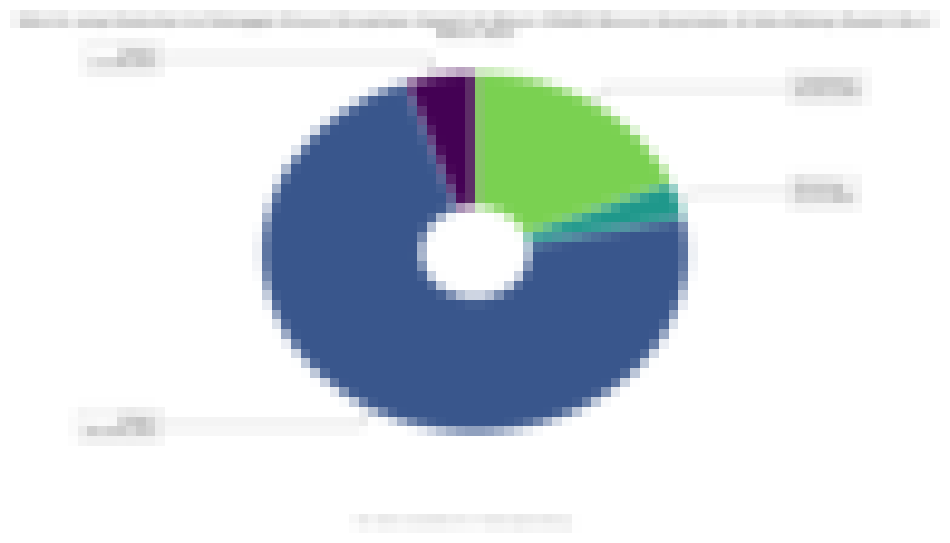

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/kaggle/working/resized_images/T0161_donut_c_96x54.png')

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

# 3D CHARTS

In [13]:
# Pake https://www.highcharts.com/demo/highcharts/3d-column-interactive (javascript) dan demo https://codepen.io/pen

# REMOVE ELEMENT

In [14]:
# Akan diedit secara manual untuk pembuatannya

# EXCEL CHART

In [15]:
# Menggunakan microsoft excel